In [1]:
# Create a LSTM model to predict the next bit of a LFSR
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers


def create_data(num_samples=10000, initial_key1=None, initial_key2=None, ln=5):
    if initial_key1 is None:
        initial_key1 = np.random.randint(0, 2, 5)
        print("Initial key 1: ", initial_key1)
    if initial_key2 is None:
        initial_key2 = np.random.randint(0, 2, 5)
        print("Initial key 2: ", initial_key2)

    # data = initial_key
    key1 = initial_key1
    key2 = initial_key2
    x = []
    y = []
    data = []
    for _ in range(num_samples):
        nxt1 = key1[0] ^ key1[1]
        nxt2 = key2[0] ^ key2[2]
        data.append(nxt1 ^ nxt2)
        if len(data) >= ln + 1:
            x.append(data[-(ln + 1) : -1])
            y.append(data[-1])
        key1 = np.roll(key1, -1)
        key2 = np.roll(key2, -1)
        key1[-1] = nxt1
        key2[-1] = nxt2

    return np.array(x), np.array(y)

2024-04-05 07:50:59.830864: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 07:50:59.984354: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/TensorRT-8.4.0.6//lib:/usr/local/cuda-11.6/lib64:/usr/local/apps/python-3.10.2/lib:/usr/local/apps/cuDNN/8.4.0-cuda-11.6/lib
2024-04-05 07:50:59.984396: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-05 07:51:02.035108: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loade

In [2]:
ln = 10
X, Y = create_data(
    10000,
    ln=ln,
    initial_key1=np.array([1, 0, 1, 1, 1]),
    initial_key2=np.array([1, 1, 1, 0, 1]),
)
X_train, Y_train = X[: 500 - ln], Y[: 500 - ln]
X_test, Y_test = X[500 - ln :], Y[500 - ln :]
print(X.shape)

(9990, 10)


In [3]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1000, input_shape=(ln,), activation="relu"),
        # tf.keras.layers.Dense(500, activation="relu"),
        # tf.keras.layers.Dense(50, activation="relu"),
        # tf.keras.layers.Dense(10, activation="relu"),
        # tf.keras.layers.Embedding(2, 5, input_length=5),
        # tf.keras.layers.LSTM(5),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              11000     
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 12,001
Trainable params: 12,001
Non-trainable params: 0
_________________________________________________________________


2024-04-05 07:51:05.764585: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/TensorRT-8.4.0.6//lib:/usr/local/cuda-11.6/lib64:/usr/local/apps/python-3.10.2/lib:/usr/local/apps/cuDNN/8.4.0-cuda-11.6/lib
2024-04-05 07:51:05.764869: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/TensorRT-8.4.0.6//lib:/usr/local/cuda-11.6/lib64:/usr/local/apps/python-3.10.2/lib:/usr/local/apps/cuDNN/8.4.0-cuda-11.6/lib
2024-04-05 07:51:05.765115: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No su

In [4]:
model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/100
16/16 - 1s - loss: 0.7049 - accuracy: 0.4592 - val_loss: 0.6976 - val_accuracy: 0.4978 - 1s/epoch - 93ms/step
Epoch 2/100
16/16 - 0s - loss: 0.6935 - accuracy: 0.4918 - val_loss: 0.6934 - val_accuracy: 0.5098 - 387ms/epoch - 24ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6924 - accuracy: 0.5265 - val_loss: 0.6904 - val_accuracy: 0.5336 - 399ms/epoch - 25ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6901 - accuracy: 0.5347 - val_loss: 0.6892 - val_accuracy: 0.5539 - 405ms/epoch - 25ms/step
Epoch 5/100
16/16 - 0s - loss: 0.6873 - accuracy: 0.5510 - val_loss: 0.6877 - val_accuracy: 0.5712 - 412ms/epoch - 26ms/step
Epoch 6/100
16/16 - 0s - loss: 0.6867 - accuracy: 0.5694 - val_loss: 0.6866 - val_accuracy: 0.5767 - 418ms/epoch - 26ms/step
Epoch 7/100
16/16 - 0s - loss: 0.6863 - accuracy: 0.5551 - val_loss: 0.6850 - val_accuracy: 0.5802 - 410ms/epoch - 26ms/step
Epoch 8/100
16/16 - 0s - loss: 0.6813 - accuracy: 0.5857 - val_loss: 0.6831 - val_accuracy: 0.5829 - 383ms/epoch - 24ms/step
Epo

In [10]:
lengths = []
accuracies = []
losses = []
tf.keras.utils.enable_interactive_logging()
for ln in range(5, 13):
    print(f"{ln - 5}/8", end="\r")
    X, Y = create_data(
        10000,
        ln=ln,
        initial_key1=np.array([1, 0, 1, 1, 1]),
        initial_key2=np.array([1, 1, 1, 0, 1]),
    )
    X_train, Y_train = X[: 800 - ln], Y[: 800 - ln]
    X_test, Y_test = X[800 - ln :], Y[800 - ln :]
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(1000, input_shape=(ln,), activation="relu"),
            # tf.keras.layers.Embedding(2, 5, input_length=ln),
            # tf.keras.layers.LSTM(5),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    # model.summary()
    callback = tf.keras.callbacks.ModelCheckpoint(
        "model.h5", monitor="val_accuracy", save_best_only=True, mode="max"
    )
    model.fit(
        X_train,
        Y_train,
        epochs=100,
        validation_data=(X_test, Y_test),
        callbacks=[callback],
        verbose=2
    )
    model = tf.keras.models.load_model("model.h5")
    l, ac = model.evaluate(X_test, Y_test)
    lengths.append(ln)
    accuracies.append(ac)
    losses.append(l)

Epoch 1/100
25/25 - 2s - loss: 0.6974 - accuracy: 0.5019 - val_loss: 0.6946 - val_accuracy: 0.5025 - 2s/epoch - 66ms/step
Epoch 2/100
25/25 - 1s - loss: 0.6943 - accuracy: 0.5195 - val_loss: 0.6938 - val_accuracy: 0.5045 - 815ms/epoch - 33ms/step
Epoch 3/100
25/25 - 1s - loss: 0.6953 - accuracy: 0.4906 - val_loss: 0.6938 - val_accuracy: 0.5063 - 820ms/epoch - 33ms/step
Epoch 4/100
25/25 - 1s - loss: 0.6936 - accuracy: 0.5145 - val_loss: 0.6932 - val_accuracy: 0.5080 - 817ms/epoch - 33ms/step
Epoch 5/100
25/25 - 1s - loss: 0.6939 - accuracy: 0.5069 - val_loss: 0.6942 - val_accuracy: 0.5051 - 792ms/epoch - 32ms/step
Epoch 6/100
25/25 - 1s - loss: 0.6937 - accuracy: 0.5145 - val_loss: 0.6931 - val_accuracy: 0.5096 - 830ms/epoch - 33ms/step
Epoch 7/100
25/25 - 1s - loss: 0.6930 - accuracy: 0.5170 - val_loss: 0.6940 - val_accuracy: 0.5089 - 773ms/epoch - 31ms/step
Epoch 8/100
25/25 - 1s - loss: 0.6934 - accuracy: 0.5069 - val_loss: 0.6930 - val_accuracy: 0.5096 - 818ms/epoch - 33ms/step
Epo

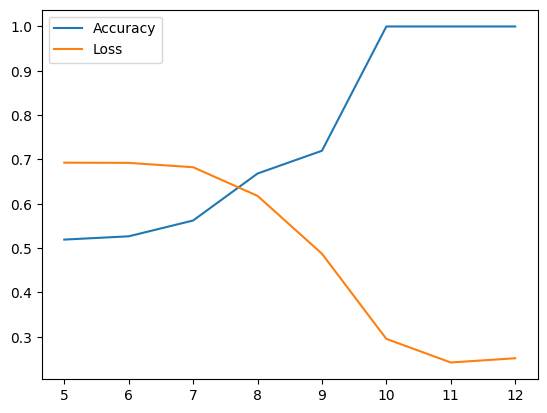

In [11]:
import matplotlib.pyplot as plt

plt.plot(lengths, accuracies)
plt.plot(lengths, losses)
plt.legend(["Accuracy", "Loss"])
plt.show()

Sequence length: 500


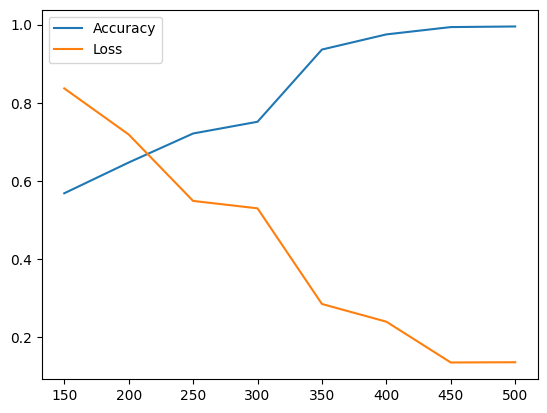

In [13]:
lengths = []
accuracies = []
losses = []
from IPython.display import clear_output

# tf.keras.utils.enable_interactive_logging()
for sq_ln in range(150, 501, 50):

    ln = 10

    X, Y = create_data(
        10000,
        ln=ln,
        initial_key1=np.array([1, 0, 1, 1, 1]),
        initial_key2=np.array([1, 1, 1, 0, 1]),
    )
    X_train, Y_train = X[: sq_ln - ln], Y[: sq_ln - ln]
    X_test, Y_test = X[sq_ln - ln :], Y[sq_ln - ln :]
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(1000, input_shape=(ln,), activation="relu"),
            # tf.keras.layers.Embedding(2, 5, input_length=ln),
            # tf.keras.layers.LSTM(5),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    # model.summary()
    callback = tf.keras.callbacks.ModelCheckpoint(
        "model.h5", monitor="val_accuracy", save_best_only=True, mode="max"
    )
    model.fit(
        X_train,
        Y_train,
        epochs=100,
        validation_data=(X_test, Y_test),
        callbacks=[callback],
        verbose=2,
    )
    model = tf.keras.models.load_model("model.h5")
    l, ac = model.evaluate(X_test, Y_test)
    lengths.append(sq_ln)
    accuracies.append(ac)
    losses.append(l)
    clear_output(wait=True)
    plt.plot(lengths, accuracies)
    plt.plot(lengths, losses)
    plt.legend(["Accuracy", "Loss"])
    print(f"Sequence length: {sq_ln}")
    plt.show()

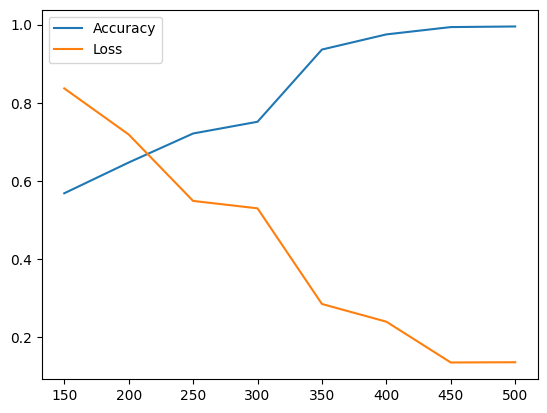

In [14]:
plt.plot(lengths, accuracies)
plt.plot(lengths, losses)
plt.legend(["Accuracy", "Loss"])
plt.show()

In [15]:
model.evaluate(X_test, Y_test)

297/297 [==============================] - 1s 3ms/step - loss: 0.1365 - accuracy: 0.9953


[0.1364639699459076, 0.9952631592750549]

In [19]:
X, Y = create_data(10000, ln=10)
model.evaluate(X, Y)

Initial key 1:  [0 0 1 1 0]
Initial key 2:  [0 1 1 1 1]
313/313 [==============================] - 1s 2ms/step - loss: 0.1361 - accuracy: 0.9952


[0.13614453375339508, 0.995195209980011]

In [ ]:
tl, tac = 0, 0
for i in range(1024):
    keys = np.binary_repr(i, width=10)
    keys = np.array([int(k) for k in keys])
    key1 = keys[:5]
    key2 = keys[5:]
    X, Y = create_data(
        10000,
        ln=15,
        initial_key1=key1,
        initial_key2=key2,
    )
    l, ac = model.evaluate(X, Y)
    print(l,ac)
    tl += l
    tac += ac
print("Total Loss and Accuracy: ", tl/1024, tac/1024)    

0.0001627977762836963 1.0
0.027096500620245934 1.0
0.027099456638097763 1.0
0.02709682285785675 1.0
0.02710133045911789 1.0
0.02709275484085083 1.0
0.027095673605799675 1.0
0.02709517441689968 1.0
0.027095001190900803 1.0
0.027100099250674248 1.0
0.027091754600405693 1.0
0.027095170691609383 1.0
0.02709691971540451 1.0
0.027092278003692627 1.0
0.02709146775305271 1.0
0.027095044031739235 1.0
0.027096008881926537 1.0
0.027098780497908592 1.0
0.027094535529613495 1.0
0.027093661949038506 1.0
0.027092503383755684 1.0
0.027091510593891144 1.0
0.027097944170236588 1.0
0.027090352028608322 1.0
0.027108965441584587 1.0
0.027095798403024673 1.0
0.027092641219496727 1.0
0.02709127776324749 1.0
0.027111951261758804 1.0
0.027092285454273224 1.0
0.027110831812024117 1.0
0.027099519968032837 1.0
0.028543516993522644 1.0
0.010601012967526913 1.0
0.010621019639074802 1.0
0.010682213120162487 1.0
0.01063036173582077 1.0
0.010549264028668404 1.0
0.010678859427571297 1.0
0.010609365068376064 1.0
0.01068

In [25]:
class ThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ThresholdCallback, self).__init__()
        self.threshold = threshold
        
    def on_epoch_end(self, epoch, logs=None):
        if logs["val_accuracy"] > self.threshold:
            self.model.stop_training = True

for i in range(10):
    key1 = np.random.randint(0, 2, 5)
    key2 = np.random.randint(0, 2, 5)
    print("---------------------")
    print("Key1: ", key1)
    print("Key2: ", key2)
    while True
    for sq_ln in range(150, 501, 50):
        ln = 10
        X, Y = create_data(
            10000,
            ln=ln,
            initial_key1=key1,
            initial_key2=key2,
        )
        X_train, Y_train = X[: sq_ln - ln], Y[: sq_ln - ln]
        X_test, Y_test = X[sq_ln - ln :], Y[sq_ln - ln :]
        model = tf.keras.models.Sequential(
            [
                tf.keras.layers.Dense(1000, input_shape=(ln,), activation="relu"),
                # tf.keras.layers.Embedding(2, 5, input_length=ln),
                # tf.keras.layers.LSTM(5),
                tf.keras.layers.Dense(1, activation="sigmoid"),
            ]
        )
        model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
        model.fit(
            X_train,
            Y_train,
            epochs=100,
            validation_data=(X_test, Y_test),
            callbacks=[ThresholdCallback(0.7)],
            verbose=0,
        )
        l, ac = model.evaluate(X_test, Y_test, verbose=0)
        if ac > 0.7:
            print(f"Sequence length: {sq_ln} with accuracy: {ac} and loss: {l}")
            break

Key1:  [1 1 1 0 0]
Key2:  [0 0 1 0 1]
Sequence length: 250 with accuracy: 0.7001025676727295 and loss: 0.6093835234642029
Key1:  [1 0 0 1 0]
Key2:  [1 0 0 1 1]
Sequence length: 250 with accuracy: 0.7047179341316223 and loss: 0.6492166519165039
Key1:  [1 1 0 1 1]
Key2:  [0 0 0 0 0]
Sequence length: 150 with accuracy: 1.0 and loss: 0.4989528954029083
Key1:  [0 0 1 0 1]
Key2:  [1 0 0 0 1]
Sequence length: 250 with accuracy: 0.7076923251152039 and loss: 0.6359493732452393
Key1:  [1 0 1 0 0]
Key2:  [1 0 1 1 0]
Sequence length: 150 with accuracy: 0.7120811939239502 and loss: 0.6169815063476562
Key1:  [1 1 0 0 0]
Key2:  [1 1 1 0 0]
Sequence length: 250 with accuracy: 0.7001025676727295 and loss: 0.5866572260856628
Key1:  [0 0 1 0 0]
Key2:  [0 0 0 0 0]
Sequence length: 150 with accuracy: 0.7142131924629211 and loss: 0.6509259343147278
Key1:  [1 0 0 1 0]
Key2:  [1 1 1 1 1]
Sequence length: 250 with accuracy: 0.7076923251152039 and loss: 0.5833685994148254
Key1:  [1 0 0 1 0]
Key2:  [0 0 0 1 1]
S

In [26]:
class ThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ThresholdCallback, self).__init__()
        self.threshold = threshold
        
    def on_epoch_end(self, epoch, logs=None):
        if logs["val_accuracy"] > self.threshold:
            self.model.stop_training = True

for i in range(10):
    key1 = np.random.randint(0, 2, 5)
    key2 = np.random.randint(0, 2, 5)
    print("Key1: ", key1)
    print("Key2: ", key2)
    for sq_ln in range(50, 501, 50):
        ln = 10
        X, Y = create_data(
            10000,
            ln=ln,
            initial_key1=key1,
            initial_key2=key2,
        )
        X_train, Y_train = X[: sq_ln - ln], Y[: sq_ln - ln]
        X_test, Y_test = X[sq_ln - ln :], Y[sq_ln - ln :]
        model = tf.keras.models.Sequential(
            [
                tf.keras.layers.Dense(1000, input_shape=(ln,), activation="relu"),
                # tf.keras.layers.Embedding(2, 5, input_length=ln),
                # tf.keras.layers.LSTM(5),
                tf.keras.layers.Dense(1, activation="sigmoid"),
            ]
        )
        model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
        model.fit(
            X_train,
            Y_train,
            epochs=100,
            validation_data=(X_test, Y_test),
            callbacks=[ThresholdCallback(0.7)],
            verbose=0,
        )
        l, ac = model.evaluate(X_test, Y_test, verbose=0)
        if ac > 0.7:
            print(f"Sequence length: {sq_ln} with accuracy: {ac} and loss: {l}")
            break

Key1:  [1 1 0 0 1]
Key2:  [1 0 1 0 1]
Sequence length: 250 with accuracy: 0.707897424697876 and loss: 0.6060001850128174
Key1:  [0 0 0 0 0]
Key2:  [0 1 1 0 1]
Sequence length: 50 with accuracy: 0.7420100569725037 and loss: 0.6757830381393433
Key1:  [1 0 1 1 0]
Key2:  [1 1 1 1 1]
Sequence length: 100 with accuracy: 0.7529292702674866 and loss: 0.6520717144012451
Key1:  [1 0 1 0 0]
Key2:  [1 0 0 1 0]
Sequence length: 100 with accuracy: 0.7027272582054138 and loss: 0.638469398021698
Key1:  [1 0 0 0 0]
Key2:  [1 0 1 1 0]
Sequence length: 250 with accuracy: 0.7061538696289062 and loss: 0.6032127141952515
Key1:  [1 0 1 1 0]
Key2:  [0 1 1 1 1]
Sequence length: 100 with accuracy: 0.7093939185142517 and loss: 0.6635072231292725
Key1:  [1 0 0 0 1]
Key2:  [0 0 0 0 0]
Sequence length: 50 with accuracy: 0.7141708731651306 and loss: 0.61024409532547
Key1:  [0 0 1 0 1]
Key2:  [0 1 0 0 1]
Sequence length: 250 with accuracy: 0.7030768990516663 and loss: 0.6300603747367859
Key1:  [1 0 0 0 0]
Key2:  [0 1

In [ ]:
class ThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ThresholdCallback, self).__init__()
        self.threshold = threshold
        
    def on_epoch_end(self, epoch, logs=None):
        if logs["val_accuracy"] > self.threshold:
            self.model.stop_training = True

for i in range(10):
    key1 = np.random.randint(0, 2, 5)
    key2 = np.random.randint(0, 2, 5)
    print("---------------------")
    print("Key1: ", key1)
    print("Key2: ", key2)
    init_key1 = key1
    init_key2 = key2
    i = 0
    while True:
        nxt = key1[0] ^ key1[1]
        key1 = np.roll(key1, -1)
        key1[-1] = nxt
        i += 1
        if np.array_equal(key1, init_key1):
            break
    print("Period of first LFSR: ", i)
    i=0
    while True:
        nxt = key2[0] ^ key2[2]
        key2 = np.roll(key2, -1)
        key2[-1] = nxt
        i += 1
        if np.array_equal(key2, init_key2):
            break
    print("Period of second LFSR: ", i)
    i = 0
    while True:
        nxt1 = key1[0] ^ key1[1]
        nxt2 = key2[0] ^ key2[2]
        key1 = np.roll(key1, -1)
        key2 = np.roll(key2, -1)
        key1[-1] = nxt1
        key2[-1] = nxt2
        i += 1
        if np.array_equal(key1, init_key1) and np.array_equal(key2, init_key2):
            break
    print("Period of combined: ", i)      
    for sq_ln in range(20, 521, 50):
        ln = 10
        X, Y = create_data(
            10000,
            ln=ln,
            initial_key1=key1,
            initial_key2=key2,
        )
        X_train, Y_train = X[: sq_ln - ln], Y[: sq_ln - ln]
        X_test, Y_test = X[sq_ln - ln :], Y[sq_ln - ln :]
        model = tf.keras.models.Sequential(
            [
                tf.keras.layers.Dense(1000, input_shape=(ln,), activation="relu"),
                # tf.keras.layers.Embedding(2, 5, input_length=ln),
                # tf.keras.layers.LSTM(5),
                tf.keras.layers.Dense(1, activation="sigmoid"),
            ]
        )
        model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
        model.fit(
            X_train,
            Y_train,
            epochs=100,
            validation_data=(X_test, Y_test),
            callbacks=[ThresholdCallback(0.7)],
            verbose=0,
        )
        l, ac = model.evaluate(X_test, Y_test, verbose=0)
        if ac > 0.7:
            print(f"Sequence length: {sq_ln} with accuracy: {ac} and loss: {l}")
            break

---------------------
Key1:  [0 1 1 1 1]
Key2:  [1 0 1 0 1]
Period of first LFSR:  21
Period of second LFSR:  31
Period of combined:  651
